# Bayesian Statistics

Bayes rule
$$
p(\theta| D) = \frac{p(D|\theta)p(\theta)}{p(D)}
$$
However, in the samples that we will soon see it is far more convenient to write the above as
$$
p(\theta| D) \propto p(D|\theta)p(\theta)
$$
since $p(D)$ is a constant **that does not depend on $\theta$**.

However, we Bayesian analysis is far more involved in solving the following integral:
$$
p(D^*|D) = \int p(D^*|\theta)p(\theta|D) d\theta
$$
We denote $D^*$ to be test data, $D$ to be the train set and $\theta$ to be a hidden parameter. This can often be thought of as doing model averaging if $p(\theta|D)$ is thought of as a weighting function.

## Coin Tossing Example

Suppose we have a biased coin where the true probability of landing heads is 0.6. We assume however, (for some odd reason that it is biased towards landing tails). A suitable prior for this would be a beta distribution which has the following functional form:
$$
p(\theta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}\theta^{\alpha - 1}(1-\theta)^{\beta - 1}
$$
and the distribution looks like (https://en.wikipedia.org/wiki/Beta_distribution):
![beta](./images/Beta_distribution_pdf.svg.png)

Since we believe it is left skewed we will choose $\alpha < \beta$. Let $\alpha = 2$, $\beta = 3$ and hence, **this forms our prior distribution**. Assume that after 10 coin tosses we observe 7 heads and 3 tails. Each (individual) coin toss is distributed as a bernoulli distribution, conditional on $\theta$, the probability of achieving a heads. At this point a frequentist method (I don't mean this in a derogative fashion) would state that the probability of receiving a heads is 0.7.

The likelihood of the data can be states as follows:
$$ p(y_1, \cdots, y_{10}| \theta) = \prod_{i=1}^{10} p(y_i|\theta)$$ since each draw is independent **given $\theta$** where, $p(y_i|\theta) = \theta^{1(y_i=1)}(1-\theta)^{1(y_i=0)}$. Hence in our example, the likelihood $ p(y_1, \cdots, y_{10}| \theta) = \theta^7(1-\theta)^3$. **Keep in mind that $\theta$ is considered fixed as far as the likelihood is concerned**, hence it is a bernoullii distribution, **not a beta distribution**.

### The posterior
\begin{align}
p(\theta | y) \propto & \quad p(y|\theta) p(\theta) \\
\propto & \quad \theta^7(1-\theta)^3 \theta^2(1-\theta)^3 = \theta^{9}(1-\theta)^6
\end{align}
The normalising constant is irrelevant as we can see that the posterior $p(\theta | y)$ is a beta distribution simply by looking at its functional form. In fact the normalising constant (also known as the partition function) is simply,
$$\int_0^1 \theta^{9}(1-\theta)^6 d\theta$$ since all probability distributions integrate out to one. In this case this turns out to be $\frac{\Gamma(9)\Gamma(6)}{\Gamma(15)}$. What is far more important to recognise than the normalising constant is that $\theta \sim Be(9, 6)$.

### The probability of $p(y^*=1|y)$
\begin{align}
p(y^*=1|y) &= \int p(y^*=1|\theta)p(\theta|y) d\theta
\end{align}

A frequentist method would have chosen the Maximum-A-Posteriori (MAP) estimate and plugged into $\theta$ without integrating it out. 
$$
\begin{align}
p(y^*=1|y) &= \int p(y^*=1|\theta)p(\theta|y) d\theta \\
&= \int \theta \frac{\Gamma(15)}{\Gamma(9)\Gamma(6)} \theta^{9}(1-\theta)^6 d\theta\\
&= \frac{\Gamma(15)}{\Gamma(9)\Gamma(6)} \int\theta^{10}(1-\theta)^6 d\theta\\
&= \frac{\Gamma(15)}{\Gamma(9)\Gamma(6)} \frac{\Gamma(10)\Gamma(6)}{\Gamma(16)} \int\frac{\Gamma(16)}{\Gamma(10)\Gamma(6)}\theta^{10}(1-\theta)^6 d\theta \\
&= \frac{\Gamma(15)}{\Gamma(9)\Gamma(6)} \frac{\Gamma(10)\Gamma(6)}{\Gamma(16)}  \quad 1 \\
&= \frac{9}{15}
\end{align}
$$
Note the rule $\Gamma(n) = (n-1)\Gamma(n-1)$ was used.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm

from scipy.special import gamma

%matplotlib inline

In [95]:
alpha = 2
beta = 3
y_obs = np.zeros(10)
y_obs[:7] = 1
niter = 10000

with pm.Model() as model:
    θ = pm.Beta('θ', alpha=alpha, beta=beta)
    y = pm.Bernoulli('y', p=θ, observed=y_obs)
    
    trace = pm.sample(niter)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 8.1227:   1%|          | 1292/200000 [00:00<00:15, 12915.73it/s]
Convergence archived at 2500
Interrupted at 2,500 [1%]: Average Loss = 7.9508
100%|██████████| 100500/100500 [00:37<00:00, 2691.01it/s]


In [105]:
# norm_const = gamma(9)*gamma(6)/gamma(15)
theta = np.linspace(0,1,1000)
post_theta = (theta**9)*(1-theta)**6
C = np.sum(post_theta*(theta[1]-theta[0]))
post_theta = post_theta/C

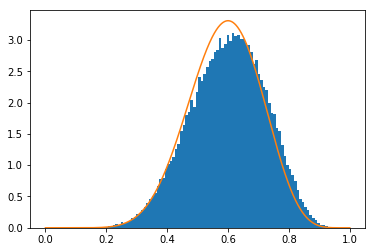

In [106]:
plt.hist(trace['θ'][1000:],100, normed='true')
plt.plot(theta, post_theta)
plt.show()

$$\int \theta p(\theta | y) d\theta \approx \sum_{\theta\sim p(\theta|y)} \theta$$

In [107]:
np.mean(trace['θ'][1000:])

0.59970305353900688